In [1]:
#import libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
#memasukkan file
df = pd.read_csv("ds_salaries.csv")

df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


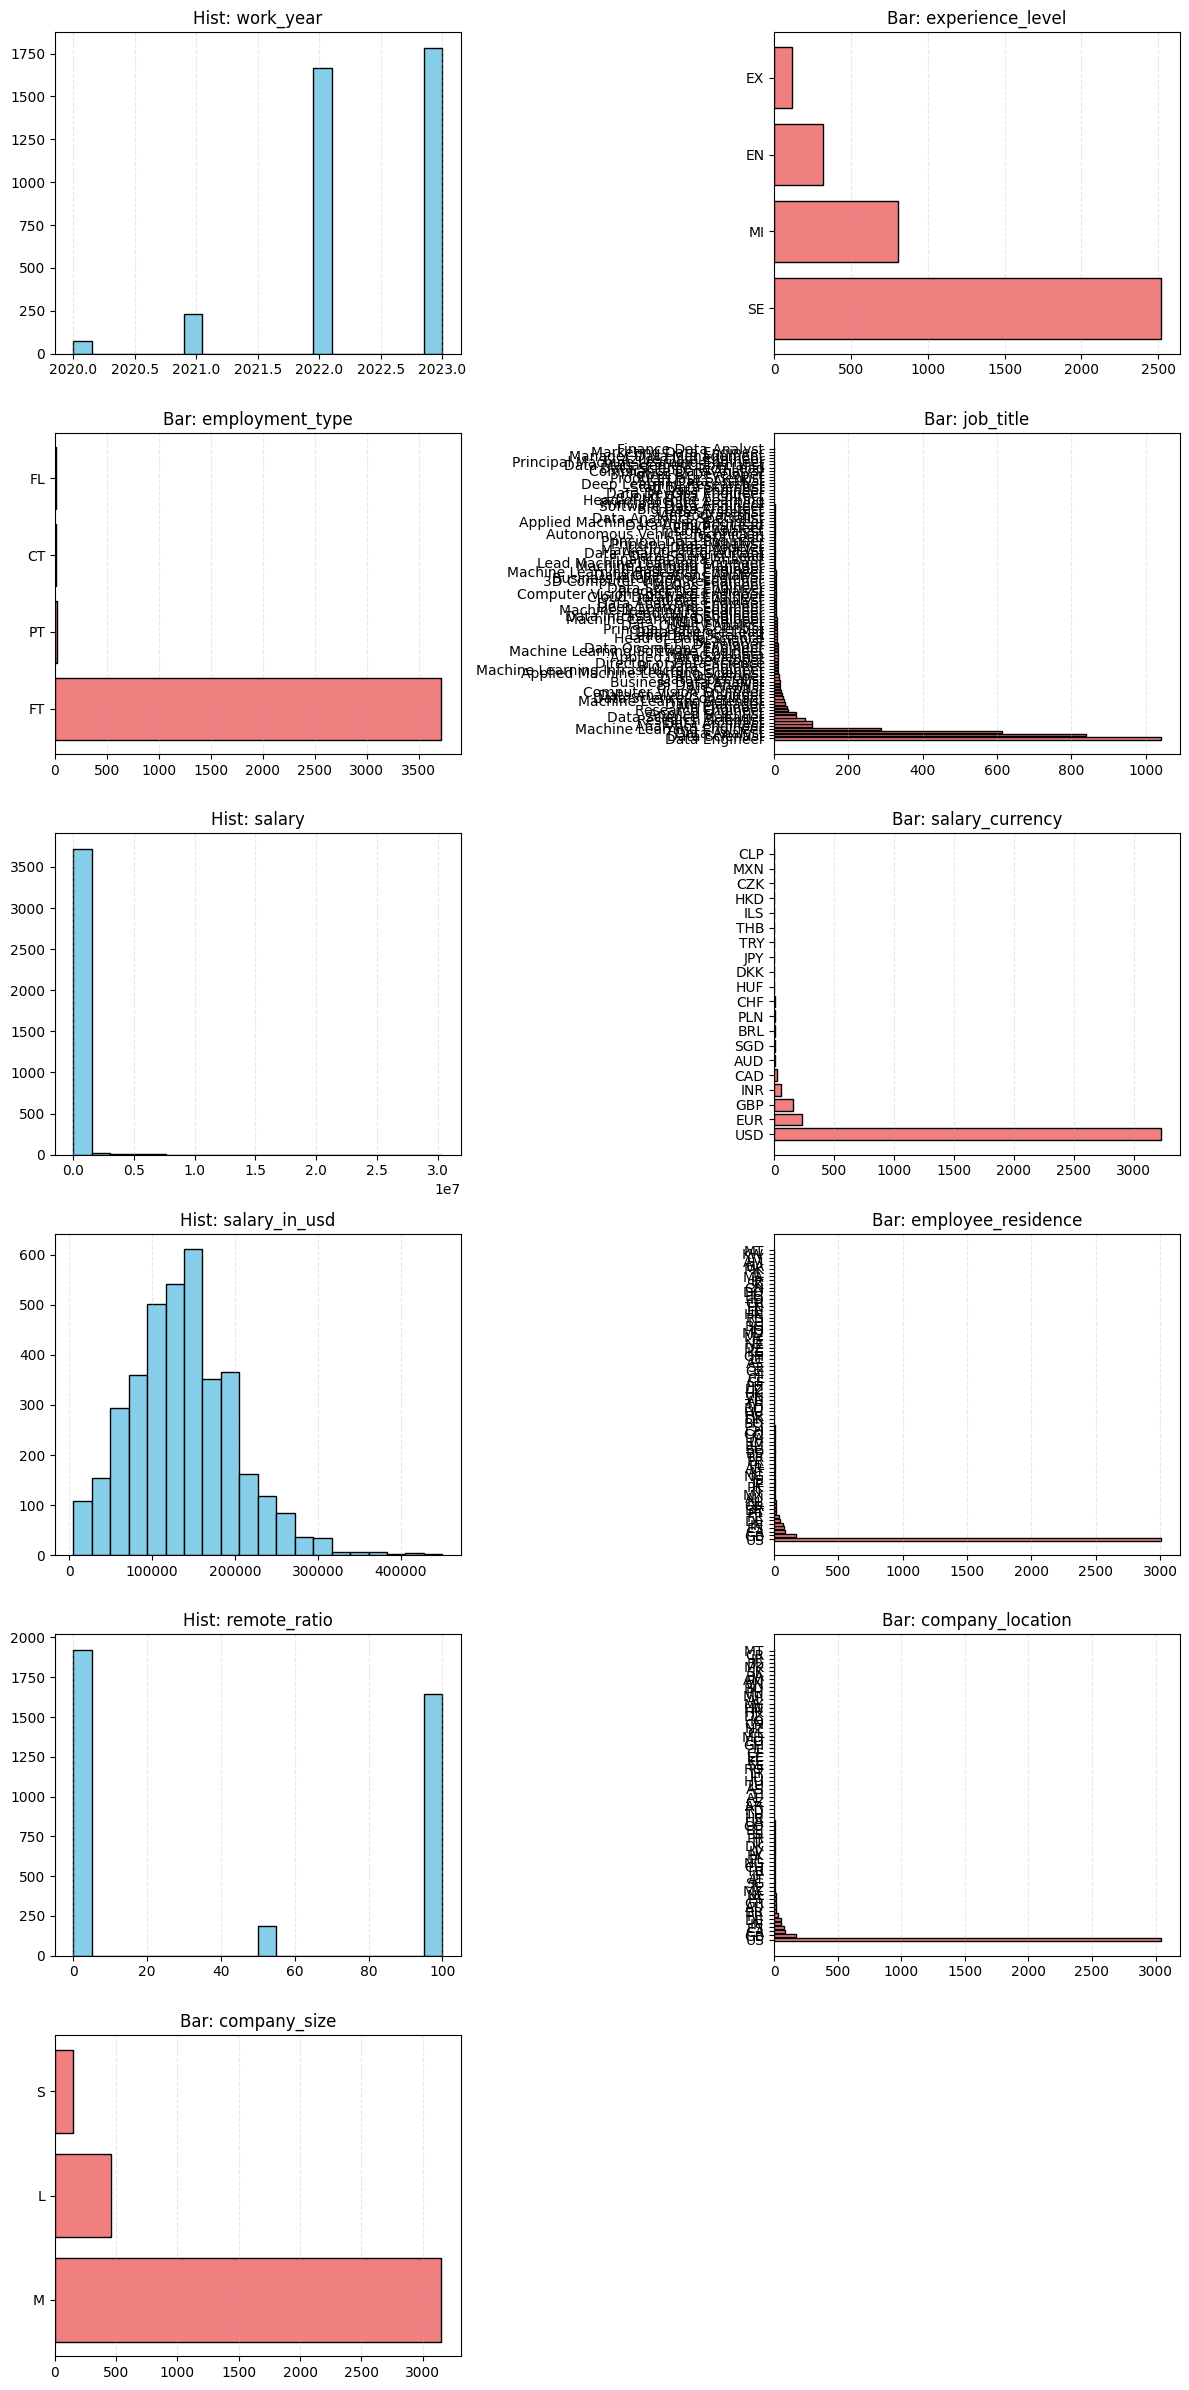

In [ ]:
n_cols = len(df.columns)
n_rows = int(np.ceil(n_cols / 2))
fig, axes = plt.subplots(n_rows, 2, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    ax = axes[i]
    data = df[col]
    if pd.api.types.is_numeric_dtype(data):
        ax.hist(data, bins=20, color='skyblue', edgecolor='black')
        ax.set_title(f'Hist: {col}')
    else:
        vc = data.value_counts()
        ax.barh(vc.index, vc.values, color='lightcoral', edgecolor='black')
        ax.set_title(f'Bar: {col}')
    ax.grid(axis='x', linestyle='--', alpha=0.3)

# Hapus axes yang tidak terpakai
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


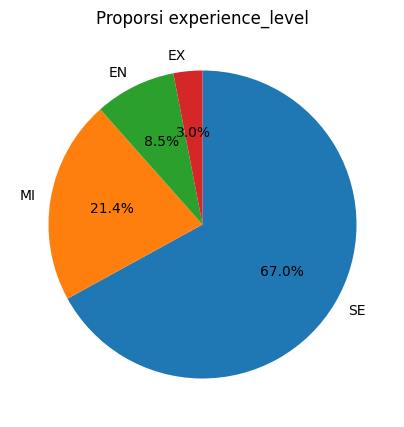

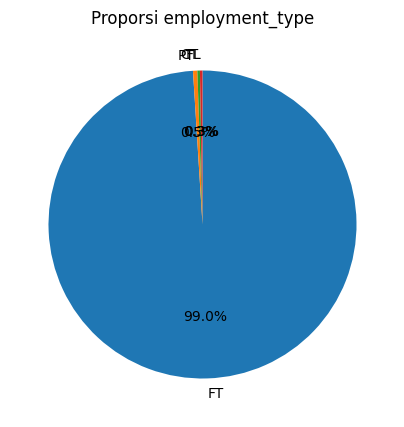

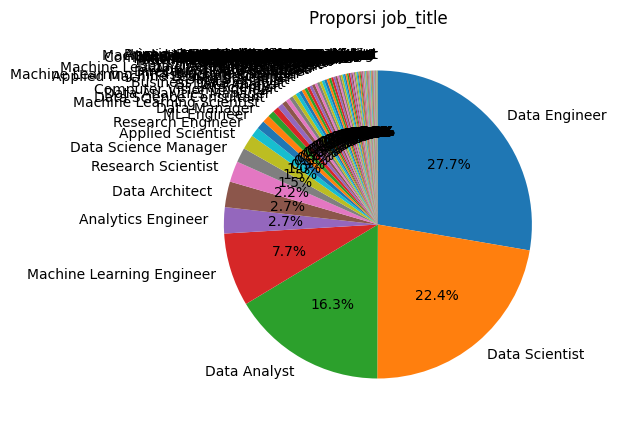

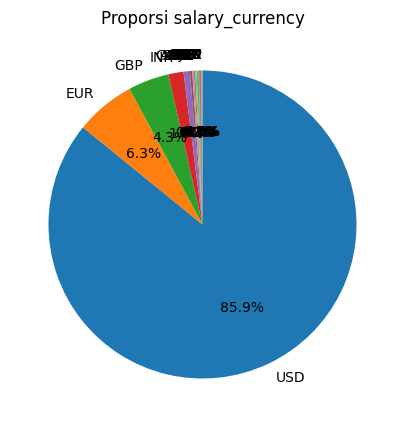

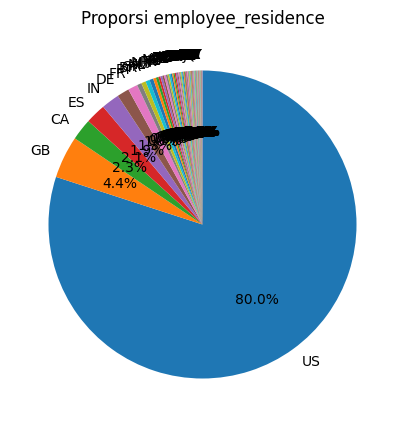

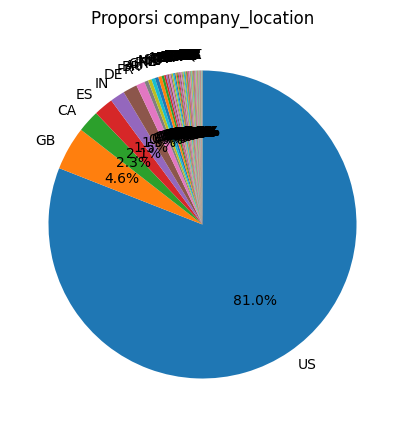

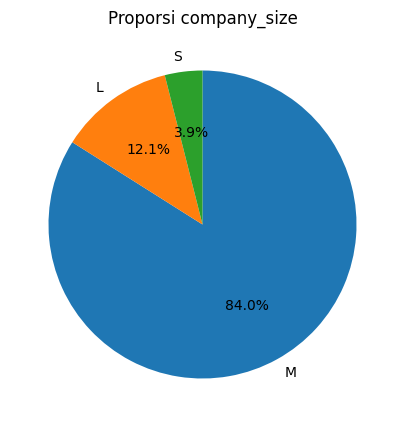

In [3]:
# Menampilkan pie chart untuk setiap fitur kategorikal di df
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(5, 5))
    df[col].value_counts(normalize=True).plot(
        kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False
    )
    plt.title(f'Proporsi {col}')
    plt.ylabel('')
    plt.show()

In [4]:
# # Ambil hanya kolom numerik dari df (kecuali 'salary_in_usd')
# num_cols = df.select_dtypes(include=[np.number]).columns.drop('salary_in_usd', errors='ignore')
# X = df[num_cols]
# y = df['salary_in_usd']

# # Split train/test
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# # Latih model RandomForest pada fitur numerik saja
# rf = RandomForestRegressor(n_estimators=100, random_state=0)
# rf.fit(X_train, y_train)

# # Hitung permutation importance
# res = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=0)
# importances = res.importances_mean

# # Tampilkan ranking 10 fitur teratas
# sorted_idx = importances.argsort()[::-1]
# for idx in sorted_idx[:10]:
#     print(f"{X.columns[idx]}  ->  Importance: {importances[idx]:.4f}")

In [5]:
# # Ambil semua kolom fitur (numerik + kategorikal, kecuali target)
# feature_cols = df.columns.drop('salary_in_usd')

# # Pisahkan X dan y
# X = df[feature_cols]
# y = df['salary_in_usd']

# # Untuk fitur kategorikal, lakukan one-hot encoding (kecuali yang sudah di-encode)
# X_encoded = pd.get_dummies(X, drop_first=True)

# # Split train/test
# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

# # Latih model RandomForest pada semua fitur
# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)

# # Hitung permutation importance
# res = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=0)
# importances = res.importances_mean

# # Tampilkan ranking 10 fitur teratas
# sorted_idx = importances.argsort()[::-1]
# for idx in sorted_idx[:10]:
#     print(f"{X_encoded.columns[idx]}  ->  Importance: {importances[idx]:.4f}")

In [6]:
#cek apakah ada missing value
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
# Cek apakah ada baris yang duplikat persis di seluruh kolom
duplicate_rows = df[df.duplicated(keep=False)]
print(f"Jumlah baris duplikat persis: {len(duplicate_rows)}")

# Hapus baris duplikat persis, hanya menyisakan satu
df = df.drop_duplicates()
print(f"Jumlah baris setelah duplikat dihapus: {len(df)}")

# Tampilkan beberapa baris pertama dari data yang sudah dibersihkan
df.head()

Jumlah baris duplikat persis: 1715
Jumlah baris setelah duplikat dihapus: 2584


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [8]:
# Cek duplikat
df.duplicated(keep=False).sum()

0

In [9]:
# Menampilkan variasi unik pada setiap kolom di df
for col in df.columns:
    print(f"{col}: {df[col].unique()[:5]}{' ...' if df[col].nunique() > 5 else ''} (total {df[col].nunique()} unik)")

work_year: [2023 2022 2020 2021] (total 4 unik)
experience_level: ['SE' 'MI' 'EN' 'EX'] (total 4 unik)
employment_type: ['FT' 'CT' 'FL' 'PT'] (total 4 unik)
job_title: ['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst'] ... (total 93 unik)
salary: [ 80000  30000  25500 175000 120000] ... (total 815 unik)
salary_currency: ['EUR' 'USD' 'INR' 'HKD' 'CHF'] ... (total 20 unik)
salary_in_usd: [ 85847  30000  25500 175000 120000] ... (total 1035 unik)
employee_residence: ['ES' 'US' 'CA' 'DE' 'GB'] ... (total 78 unik)
remote_ratio: [100   0  50] (total 3 unik)
company_location: ['ES' 'US' 'CA' 'DE' 'GB'] ... (total 72 unik)
company_size: ['L' 'S' 'M'] (total 3 unik)


In [10]:
# Menampilkan 10 nilai yang paling sering muncul pada setiap kolom di duplicate_rows
for col in duplicate_rows.columns:
    print(f"\nKolom '{col}': 10 nilai paling sering muncul:")
    top_10 = duplicate_rows[col].value_counts().head(10)
    for value, count in top_10.items():
        print(f"  {value}: {count} kali")



Kolom 'work_year': 10 nilai paling sering muncul:
  2023: 928 kali
  2022: 781 kali
  2021: 4 kali
  2020: 2 kali

Kolom 'experience_level': 10 nilai paling sering muncul:
  SE: 1378 kali
  MI: 229 kali
  EN: 78 kali
  EX: 30 kali

Kolom 'employment_type': 10 nilai paling sering muncul:
  FT: 1715 kali

Kolom 'job_title': 10 nilai paling sering muncul:
  Data Engineer: 638 kali
  Data Scientist: 433 kali
  Data Analyst: 321 kali
  Machine Learning Engineer: 118 kali
  Data Architect: 57 kali
  Applied Scientist: 40 kali
  Research Scientist: 25 kali
  Analytics Engineer: 22 kali
  Data Manager: 11 kali
  Research Engineer: 8 kali

Kolom 'salary': 10 nilai paling sering muncul:
  160000: 64 kali
  150000: 59 kali
  100000: 59 kali
  130000: 58 kali
  120000: 56 kali
  140000: 47 kali
  145000: 40 kali
  135000: 37 kali
  175000: 35 kali
  170000: 34 kali

Kolom 'salary_currency': 10 nilai paling sering muncul:
  USD: 1629 kali
  EUR: 53 kali
  GBP: 31 kali
  INR: 2 kali

Kolom 'salary_

C:\Users\ADVAN\AppData\Local\Temp\ipykernel_20144\3443853881.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variation_counts.index, y=variation_counts.values, palette='viridis')


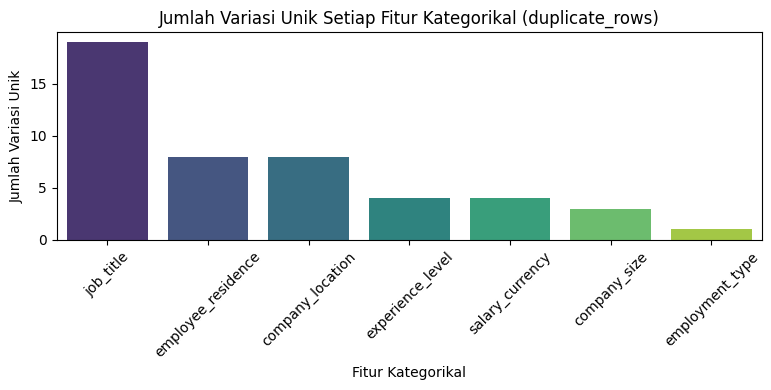

In [ ]:
# # Plot histogram jumlah variasi unik untuk setiap fitur kategorikal di duplicate_rows
# categorical_cols = duplicate_rows.select_dtypes(include='object').columns

# variation_counts = duplicate_rows[categorical_cols].nunique().sort_values(ascending=False)
# plt.figure(figsize=(8,4))
# sns.barplot(x=variation_counts.index, y=variation_counts.values, palette='viridis')
# plt.title('Jumlah Variasi Unik Setiap Fitur Kategorikal (duplicate_rows)')
# plt.ylabel('Jumlah Variasi Unik')
# plt.xlabel('Fitur Kategorikal')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

In [11]:
df['is_usd'] = (df['salary_currency'] == 'USD').astype(int)
df[['salary_currency', 'is_usd']].head()


,salary_currency,is_usd
0,EUR,0
1,USD,1
2,USD,1
3,USD,1
4,USD,1


In [12]:
df['company_location'].value_counts().to_json()


'{"US":1929,"GB":155,"CA":83,"IN":57,"DE":55,"ES":44,"FR":33,"BR":15,"AU":14,"PT":14,"NL":13,"GR":11,"MX":10,"IE":7,"SG":6,"AT":6,"JP":6,"TR":5,"CH":5,"NG":5,"PL":5,"PK":4,"LV":4,"DK":4,"IT":4,"PR":4,"SI":4,"BE":4,"CO":4,"UA":4,"HR":3,"TH":3,"RU":3,"AR":3,"CZ":3,"AE":3,"FI":3,"AS":3,"LU":3,"HU":2,"ID":2,"LT":2,"RO":2,"SE":2,"KE":2,"EE":2,"CF":2,"IL":2,"GH":2,"EG":1,"MD":1,"CL":1,"NZ":1,"CN":1,"IQ":1,"DZ":1,"HK":1,"HN":1,"MY":1,"AL":1,"MA":1,"PH":1,"BO":1,"VN":1,"AM":1,"BA":1,"SK":1,"MK":1,"BS":1,"IR":1,"CR":1,"MT":1}'

In [13]:
df['company_location_is_usd'] = (df['company_location'] == 'US').astype(int)
df[['company_location', 'company_location_is_usd']].head()

,company_location,company_location_is_usd
0,ES,0
1,US,1
2,US,1
3,CA,0
4,CA,0


In [14]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,is_usd,company_location_is_usd
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,0,0
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,1,1
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,1,1
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,1,0
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,1,0


In [15]:
df['employee_residence_is_usd'] = (df['employee_residence'] == 'US').astype(int)
df[['employee_residence', 'employee_residence_is_usd']].head()

,employee_residence,employee_residence_is_usd
0,ES,0
1,US,1
2,US,1
3,CA,0
4,CA,0


In [16]:
df['salary_currency'].value_counts().to_json()

'{"USD":2107,"EUR":200,"GBP":144,"INR":59,"CAD":25,"AUD":9,"SGD":6,"BRL":6,"PLN":5,"CHF":4,"HUF":3,"DKK":3,"JPY":3,"TRY":3,"THB":2,"ILS":1,"HKD":1,"CZK":1,"MXN":1,"CLP":1}'

In [17]:
df['employment_type'].value_counts().to_json()

'{"FT":2547,"PT":17,"CT":10,"FL":10}'

In [18]:
df['employee_residence'].value_counts().to_json()


'{"US":1893,"GB":150,"CA":81,"IN":70,"ES":47,"DE":47,"FR":37,"PT":18,"BR":18,"NL":15,"GR":13,"AU":11,"MX":10,"IT":8,"PK":8,"JP":7,"IE":7,"NG":7,"AT":6,"AR":6,"PL":6,"PR":5,"TR":5,"BE":5,"SG":5,"RU":4,"LV":4,"UA":4,"CO":4,"CH":4,"SI":4,"BO":3,"DK":3,"HR":3,"HU":3,"RO":3,"TH":3,"AE":3,"VN":3,"HK":2,"UZ":2,"PH":2,"CF":2,"CL":2,"FI":2,"CZ":2,"SE":2,"AS":2,"LT":2,"GH":2,"KE":2,"DZ":1,"NZ":1,"JE":1,"MY":1,"MD":1,"IQ":1,"BG":1,"LU":1,"RS":1,"HN":1,"EE":1,"TN":1,"CR":1,"ID":1,"EG":1,"DO":1,"CN":1,"SK":1,"IR":1,"MA":1,"IL":1,"MK":1,"BA":1,"AM":1,"CY":1,"KW":1,"MT":1}'

In [19]:
df['job_title'].value_counts().to_json()

'{"Data Engineer":598,"Data Scientist":538,"Data Analyst":396,"Machine Learning Engineer":206,"Analytics Engineer":91,"Research Scientist":65,"Data Architect":64,"Data Science Manager":52,"ML Engineer":34,"Research Engineer":33,"Applied Scientist":31,"Machine Learning Scientist":26,"Data Science Consultant":23,"Data Manager":23,"Computer Vision Engineer":18,"Data Analytics Manager":18,"AI Scientist":16,"BI Data Analyst":15,"Business Data Analyst":15,"Data Specialist":12,"Applied Machine Learning Scientist":12,"Big Data Engineer":11,"BI Developer":11,"AI Developer":11,"Director of Data Science":11,"Machine Learning Infrastructure Engineer":11,"Head of Data":10,"Applied Data Scientist":10,"Machine Learning Software Engineer":10,"Lead Data Scientist":9,"Head of Data Science":9,"BI Analyst":9,"Data Science Lead":8,"Principal Data Scientist":8,"NLP Engineer":7,"ETL Developer":7,"Machine Learning Developer":7,"Data Infrastructure Engineer":6,"Data Analytics Engineer":6,"Data Operations Engin

In [20]:
df['work_year'].value_counts().to_json()

'{"2023":1156,"2022":1125,"2021":228,"2020":75}'

In [21]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

ord_enc = OrdinalEncoder(categories=[['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']])
df[['experience_enc', 'company_size_enc']] = ord_enc.fit_transform(df[['experience_level', 'company_size']])

ohe = OneHotEncoder(sparse_output=False)
arr = ohe.fit_transform(df[['employment_type']])
df[ohe.get_feature_names_out(['employment_type'])] = arr

In [22]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,is_usd,company_location_is_usd,employee_residence_is_usd,experience_enc,company_size_enc,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,0,0,0,2.0,2.0,0.0,0.0,1.0,0.0
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,1,1,1,1.0,0.0,1.0,0.0,0.0,0.0
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,1,1,1,1.0,0.0,1.0,0.0,0.0,0.0
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,1,0,0,2.0,1.0,0.0,0.0,1.0,0.0
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,1,0,0,2.0,1.0,0.0,0.0,1.0,0.0


In [23]:
# Ambil hanya kolom numerik dari df (kecuali 'salary_in_usd')
num_cols = df.select_dtypes(include=[np.number]).columns.drop('salary_in_usd', errors='ignore')
X = df[num_cols]
y = df['salary_in_usd']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Latih model RandomForest pada fitur numerik saja
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# Hitung permutation importance
res = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=0)
importances = res.importances_mean

# Tampilkan ranking 10 fitur teratas
sorted_idx = importances.argsort()[::-1]
for idx in sorted_idx[:100]:
    print(f"{X.columns[idx]}  ->  Importance: {importances[idx]:.4f}")

salary  ->  Importance: 1.7476
is_usd  ->  Importance: 0.4157
remote_ratio  ->  Importance: 0.0033
experience_enc  ->  Importance: 0.0024
company_location_is_usd  ->  Importance: 0.0002
work_year  ->  Importance: 0.0001
employment_type_CT  ->  Importance: 0.0000
employment_type_FL  ->  Importance: 0.0000
employment_type_FT  ->  Importance: -0.0004
employment_type_PT  ->  Importance: -0.0005
company_size_enc  ->  Importance: -0.0007
employee_residence_is_usd  ->  Importance: -0.0018


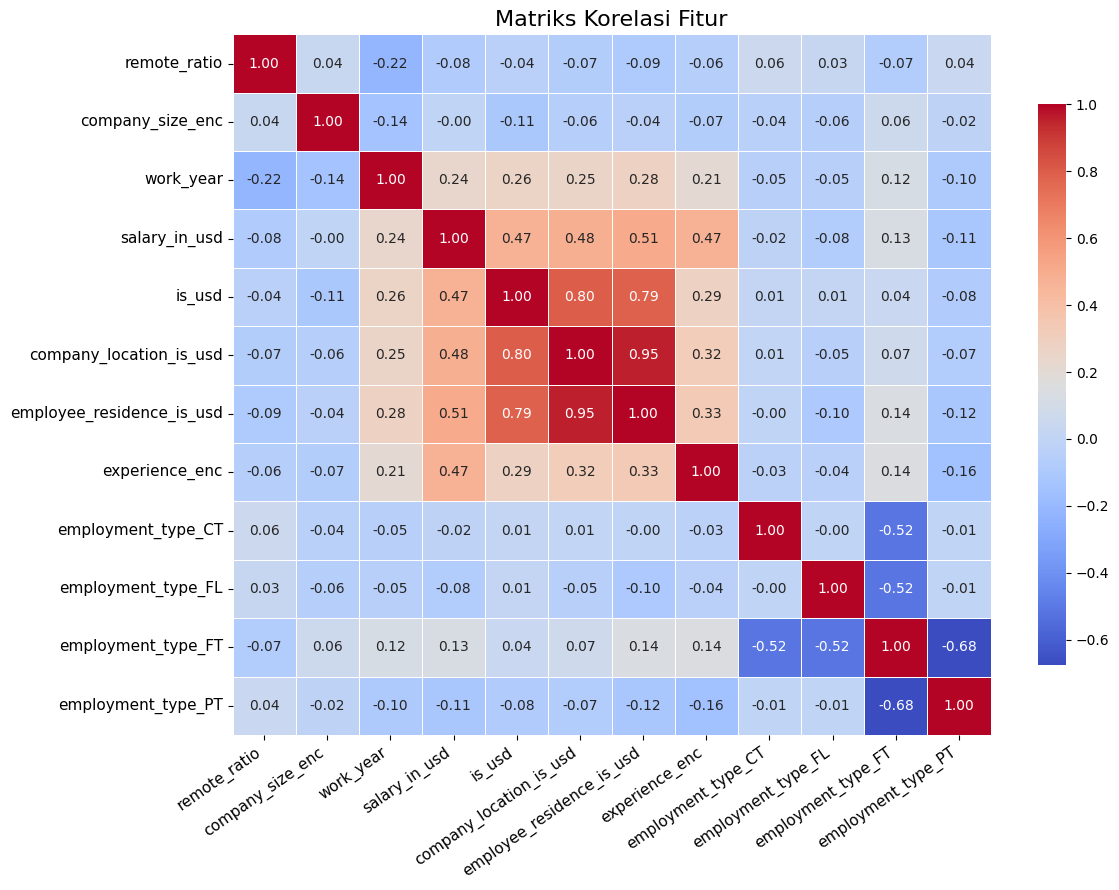

In [24]:
plt.figure(figsize=(12, 9))
cols = [
    'remote_ratio', 'company_size_enc', 'work_year', 'salary_in_usd', 'is_usd',
    'company_location_is_usd', 'employee_residence_is_usd', 'experience_enc',
    'employment_type_CT', 'employment_type_FL', 'employment_type_FT', 'employment_type_PT'
]
corr = df[cols].corr()
sns.heatmap(
    corr, annot=True, cmap='coolwarm', fmt=".2f",
    annot_kws={"size": 10}, linewidths=0.5, cbar_kws={"shrink": 0.8}
)
plt.title('Matriks Korelasi Fitur', fontsize=16)
plt.xticks(rotation=35, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

In [25]:
df = df[['work_year','experience_enc', 'salary_in_usd', 'is_usd', 'company_location_is_usd', 'employee_residence_is_usd']]

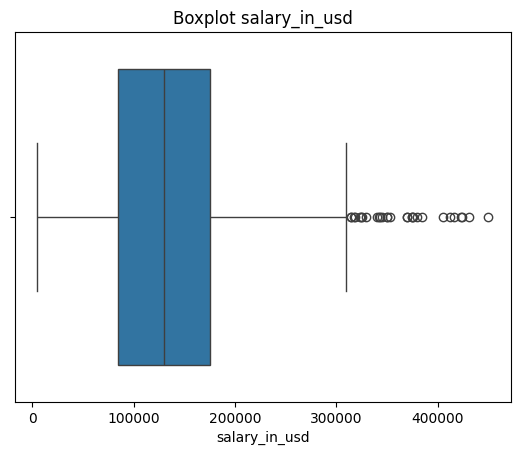

In [26]:
sns.boxplot(x=df["salary_in_usd"])
plt.title(f'Boxplot {"salary_in_usd"}')
plt.xlabel("salary_in_usd")
plt.show()

In [27]:
# Menghapus outlier pada salary_in_usd, experience_enc, dan work_year secara bersamaan
def remove_outliers(df_used, cols):
    mask = np.ones(len(df_used), dtype=bool)
    for col in cols:
        Q1 = df_used[col].quantile(0.25)
        Q3 = df_used[col].quantile(0.75)
        IQR = Q3 - Q1
        mask &= (df_used[col] >= (Q1 - 1.5 * IQR)) & (df_used[col] <= (Q3 + 1.5 * IQR))
    return df_used[mask]

df = remove_outliers(df, ['salary_in_usd'])

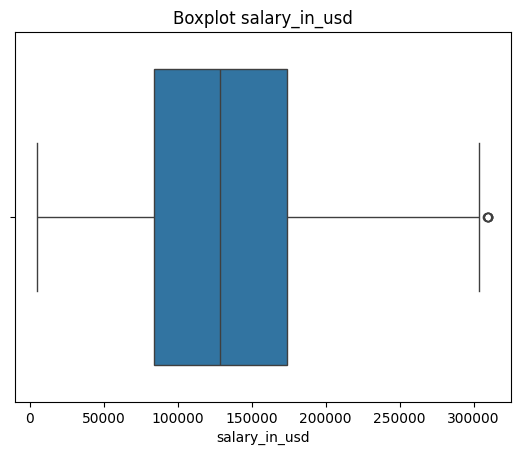

In [28]:
sns.boxplot(x=df["salary_in_usd"])
plt.title(f'Boxplot {"salary_in_usd"}')
plt.xlabel("salary_in_usd")
plt.show()

In [29]:
df = remove_outliers(df, ['salary_in_usd'])

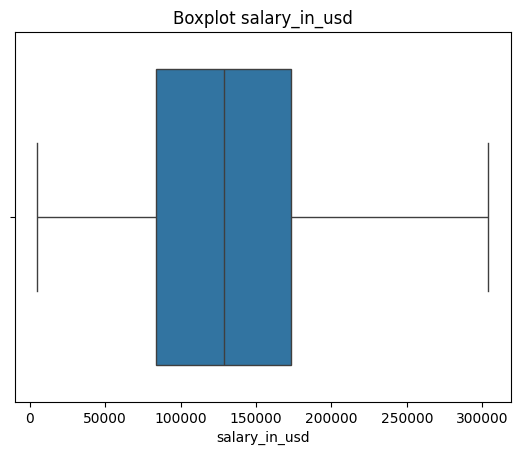

In [30]:
sns.boxplot(x=df["salary_in_usd"])
plt.title(f'Boxplot {"salary_in_usd"}')
plt.xlabel("salary_in_usd")
plt.show()

In [31]:
df.describe()

,work_year,experience_enc,salary_in_usd,is_usd,company_location_is_usd,employee_residence_is_usd
count,2551.000000,2551.000000,2551.000000,2551.000000,2551.000000,2551.000000
mean,2022.301058,1.564093,130501.026656,0.813799,0.744022,0.729910
std,0.746439,0.725791,62302.571118,0.389346,0.436495,0.444093
min,2020.000000,0.000000,5132.000000,0.000000,0.000000,0.000000
25%,2022.000000,1.000000,84053.000000,1.000000,0.000000,0.000000
50%,2022.000000,2.000000,128750.000000,1.000000,1.000000,1.000000
75%,2023.000000,2.000000,173381.000000,1.000000,1.000000,1.000000
max,2023.000000,3.000000,304000.000000,1.000000,1.000000,1.000000


In [32]:
df.head()

,work_year,experience_enc,salary_in_usd,is_usd,company_location_is_usd,employee_residence_is_usd
0,2023,2.0,85847,0,0,0
1,2023,1.0,30000,1,1,1
2,2023,1.0,25500,1,1,1
3,2023,2.0,175000,1,0,0
4,2023,2.0,120000,1,0,0


In [33]:
df.describe()

,work_year,experience_enc,salary_in_usd,is_usd,company_location_is_usd,employee_residence_is_usd
count,2551.000000,2551.000000,2551.000000,2551.000000,2551.000000,2551.000000
mean,2022.301058,1.564093,130501.026656,0.813799,0.744022,0.729910
std,0.746439,0.725791,62302.571118,0.389346,0.436495,0.444093
min,2020.000000,0.000000,5132.000000,0.000000,0.000000,0.000000
25%,2022.000000,1.000000,84053.000000,1.000000,0.000000,0.000000
50%,2022.000000,2.000000,128750.000000,1.000000,1.000000,1.000000
75%,2023.000000,2.000000,173381.000000,1.000000,1.000000,1.000000
max,2023.000000,3.000000,304000.000000,1.000000,1.000000,1.000000


In [34]:
df.head()

,work_year,experience_enc,salary_in_usd,is_usd,company_location_is_usd,employee_residence_is_usd
0,2023,2.0,85847,0,0,0
1,2023,1.0,30000,1,1,1
2,2023,1.0,25500,1,1,1
3,2023,2.0,175000,1,0,0
4,2023,2.0,120000,1,0,0


In [35]:
df.isnull().sum()

work_year                    0
experience_enc               0
salary_in_usd                0
is_usd                       0
company_location_is_usd      0
employee_residence_is_usd    0
dtype: int64

In [36]:
# normalisasi data
scaler = MinMaxScaler()
df[['salary_normalized','year_normalized']] = scaler.fit_transform(df[['salary_in_usd','work_year']])
df.head()

,work_year,experience_enc,salary_in_usd,is_usd,company_location_is_usd,employee_residence_is_usd,salary_normalized,year_normalized
0,2023,2.0,85847,0,0,0,0.270069,1.0
1,2023,1.0,30000,1,1,1,0.083207,1.0
2,2023,1.0,25500,1,1,1,0.068150,1.0
3,2023,2.0,175000,1,0,0,0.568371,1.0
4,2023,2.0,120000,1,0,0,0.384344,1.0


In [37]:
df.drop(columns=['salary_in_usd',"work_year"], inplace=True)
df.describe()

,experience_enc,is_usd,company_location_is_usd,employee_residence_is_usd,salary_normalized,year_normalized
count,2551.000000,2551.000000,2551.000000,2551.000000,2551.000000,2551.000000
mean,1.564093,0.813799,0.744022,0.729910,0.419480,0.767019
std,0.725791,0.389346,0.436495,0.444093,0.208462,0.248813
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.264066,0.666667
50%,2.000000,1.000000,1.000000,1.000000,0.413621,0.666667
75%,2.000000,1.000000,1.000000,1.000000,0.562954,1.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
# Menampilkan variasi unik pada setiap kolom di df
for col in df.columns:
    print(f"{col}: {df[col].unique()[:5]}{' ...' if df[col].nunique() > 5 else ''} (total {df[col].nunique()} unik)")

experience_enc: [2. 1. 0. 3.] (total 4 unik)
is_usd: [0 1] (total 2 unik)
company_location_is_usd: [0 1] (total 2 unik)
employee_residence_is_usd: [0 1] (total 2 unik)
salary_normalized: [0.27006906 0.0832073  0.06815049 0.56837132 0.38434359] ... (total 1007 unik)
year_normalized: [1.         0.66666667 0.         0.33333333] (total 4 unik)


In [39]:
df['experience_enc'].value_counts().to_json()

'{"2.0":1533,"1.0":660,"0.0":270,"3.0":88}'

In [40]:
from IPython.display import FileLink

# Simpan df ke file CSV
df.to_csv('df_download.csv', index=False)

# Tampilkan link download
FileLink('df_download.csv')

c:\Users\ADVAN\OneDrive\Dokumen\py\TubesDKA\TubesKita\df_download.csv

In [41]:
df.isnull().sum()

experience_enc               0
is_usd                       0
company_location_is_usd      0
employee_residence_is_usd    0
salary_normalized            0
year_normalized              0
dtype: int64

In [42]:
# Membuat X dan y
X = df[['experience_enc', 'is_usd', 'company_location_is_usd', 'employee_residence_is_usd','year_normalized']]
y = df['salary_normalized']

# Split train/test dengan stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# --- 2.1. Split data (sudah Anda lakukan) ---
X = df[['experience_enc',
        'is_usd',
        'company_location_is_usd',
        'employee_residence_is_usd',
        'year_normalized']]
y = df['salary_normalized']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 2.2. Fungsi Utility: Menghitung Q1, Median, Q3, Min, Max ---
def get_fuzzy_ranges(col):
    """
    Mengembalikan (min, Q1, median, Q3, max) 
    dari data X_train[col].
    """
    q1 = X_train[col].quantile(0.25)
    median = X_train[col].median()
    q3 = X_train[col].quantile(0.75)
    min_val = X_train[col].min()
    max_val = X_train[col].max()
    return min_val, q1, median, q3, max_val

def calculate_offset(q1, q3):
    """
    Offset = 20% * IQR (q3 - q1)
    """
    return 0.2 * (q3 - q1)

# --- 2.3. Fungsi Segitiga (Trimf) ---
def trimf(x, a, b, c):
    """
    Triangular membership function:
      a = titik mulai naik (nilai keanggotaan mulai > 0)
      b = puncak (nilai keanggotaan = 1)
      c = titik turun (nilai keanggotaan kembali 0)
    """
    if x <= a or x >= c:
        return 0.0
    elif a < x < b:
        return (x - a) / (b - a)
    elif b < x < c:
        return (c - x) / (c - b)
    elif x == b:
        return 1.0
    return 0.0

# --- 2.4. Fungsi untuk Membuat Membership Functions (Low/Medium/High) ---
def create_continuous_membership(col_name):
    """
    Menghasilkan tiga fungsi keanggotaan (low, med, high)
    untuk kolom kontinu X_train[col_name].
    Juga mengembalikan tuple stats untuk keperluan visualisasi.
    """
    # Ambil statistik
    min_val, q1, med, q3, max_val = get_fuzzy_ranges(col_name)
    offset = calculate_offset(q1, q3)

    # Definisikan fungsi keanggotaan
    def low(x): 
        # Segitiga mulai  min_val - min_val - (q1+offset)
        return trimf(x, min_val, min_val, q1 + offset)

    def medium(x):
        # Segitiga mulai  (q1-offset) - med - (q3+offset)
        return trimf(x, q1 - offset, med, q3 + offset)

    def high(x):
        # Segitiga mulai  (q3-offset) - max_val - max_val
        return trimf(x, q3 - offset, max_val, max_val)

    stats = (min_val, q1, med, q3, max_val, offset)
    return low, medium, high, stats

# --- 2.5. Terapkan untuk Semua Variabel Kontinu ---
# 2 variabel kontinu: 'experience_enc' dan 'year_normalized'
exp_low, exp_med, exp_high, exp_stats = create_continuous_membership('experience_enc')
yr_low, yr_med, yr_high, yr_stats   = create_continuous_membership('year_normalized')


In [44]:
# Cek missing value pada X_train, X_test, y_train, y_test
def check_missing(X_train, X_test, y_train, y_test):
    print("Cek missing value pada X_train:")
    if X_train.isnull().any().any():
        print(X_train.isnull().sum()[X_train.isnull().sum() > 0])
        print("Baris dengan NaN di X_train:")
        print(X_train[X_train.isnull().any(axis=1)])
    else:
        print("Tidak ada missing value di X_train.\n")

    print("\nCek missing value pada X_test:")
    if X_test.isnull().any().any():
        print(X_test.isnull().sum()[X_test.isnull().sum() > 0])
        print("Baris dengan NaN di X_test:")
        print(X_test[X_test.isnull().any(axis=1)])
    else:
        print("Tidak ada missing value di X_test.\n")

    print("\nCek missing value pada y_train:")
    if y_train.isnull().any():
        print(f"Jumlah missing value di y_train: {y_train.isnull().sum()}")
        print("Index dengan NaN di y_train:")
        print(y_train[y_train.isnull()])
    else:
        print("Tidak ada missing value di y_train.\n")

    print("\nCek missing value pada y_test:")
    if y_test.isnull().any():
        print(f"Jumlah missing value di y_test: {y_test.isnull().sum()}")
        print("Index dengan NaN di y_test:")
        print(y_test[y_test.isnull()])
    else:
        print("Tidak ada missing value di y_test.\n")

# Jalankan fungsi pengecekan
check_missing(X_train, X_test, y_train, y_test)

Cek missing value pada X_train:
Tidak ada missing value di X_train.


Cek missing value pada X_test:
Tidak ada missing value di X_test.


Cek missing value pada y_train:
Tidak ada missing value di y_train.


Cek missing value pada y_test:
Tidak ada missing value di y_test.



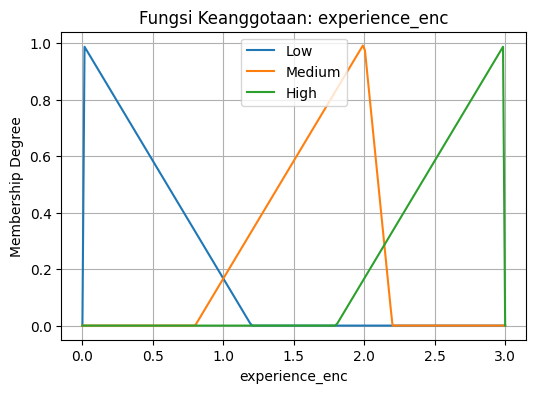

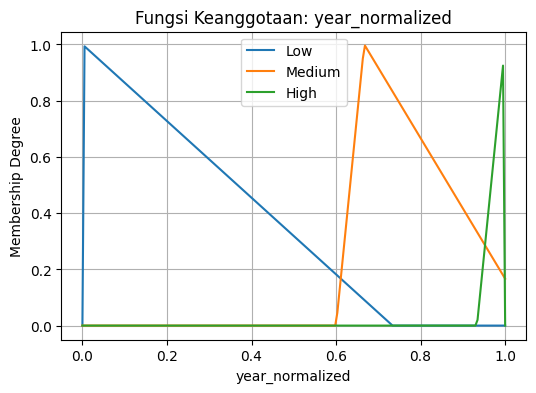

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def plot_stats(col_name, stats, low_fn, med_fn, high_fn):
    min_val, q1, med, q3, max_val, offset = stats
    x = np.linspace(min_val, max_val, 200)

    low_vals  = [low_fn(i) for i in x]
    med_vals  = [med_fn(i) for i in x]
    high_vals = [high_fn(i) for i in x]

    plt.figure(figsize=(6,4))
    plt.plot(x, low_vals,  label='Low')
    plt.plot(x, med_vals,  label='Medium')
    plt.plot(x, high_vals, label='High')
    plt.title(f'Fungsi Keanggotaan: {col_name}')
    plt.xlabel(col_name)
    plt.ylabel('Membership Degree')
    plt.legend()
    plt.grid(True)
    plt.show()

# Contoh untuk 'experience_enc'
plot_stats('experience_enc', exp_stats, exp_low, exp_med, exp_high)

# Contoh untuk 'year_normalized'
plot_stats('year_normalized', yr_stats, yr_low, yr_med, yr_high)


In [46]:
# --- 4. Membership untuk Variabel Boolean ---
def create_bool_membership(col_name):
    def false_fn(x): return 1.0 if x == 0 else 0.0
    def true_fn(x):  return 1.0 if x == 1 else 0.0
    return false_fn, true_fn

is_usd_false, is_usd_true                   = create_bool_membership('is_usd')
comp_loc_false, comp_loc_true               = create_bool_membership('company_location_is_usd')
emp_res_false, emp_res_true                 = create_bool_membership('employee_residence_is_usd')

In [47]:
# --- 5. Membership Output (Contoh Mamdani) ---
min_sal = y_train.min()
q1_sal  = y_train.quantile(0.25)
med_sal = y_train.median()
q3_sal  = y_train.quantile(0.75)
max_sal = y_train.max()
offset_sal = 0.2 * (q3_sal - q1_sal)

def sal_low(x):
    return trimf(x, min_sal, min_sal, q1_sal + offset_sal)

def sal_med(x):
    return trimf(x, q1_sal - offset_sal, med_sal, q3_sal + offset_sal)

def sal_high(x):
    return trimf(x, q3_sal - offset_sal, max_sal, max_sal)

In [48]:
fuzzy_rules = [
    {'if': ('low', 'low', 'false', 'false', 'false'), 'then': 'low'},
    {'if': ('low', 'low', 'false', 'false', 'true'),  'then': 'low'},
    {'if': ('low', 'low', 'false', 'true',  'false'), 'then': 'low'},
    {'if': ('low', 'low', 'false', 'true',  'true'),  'then': 'medium'},
    {'if': ('low', 'low', 'true',  'false', 'false'), 'then': 'low'},
    {'if': ('low', 'low', 'true',  'false', 'true'),  'then': 'medium'},
    {'if': ('low', 'low', 'true',  'true',  'false'), 'then': 'medium'},
    {'if': ('low', 'low', 'true',  'true',  'true'),  'then': 'medium'},

    {'if': ('low', 'medium', 'false', 'false', 'false'), 'then': 'low'},
    {'if': ('low', 'medium', 'false', 'false', 'true'),  'then': 'low'},
    {'if': ('low', 'medium', 'false', 'true',  'false'), 'then': 'low'},
    {'if': ('low', 'medium', 'false', 'true',  'true'),  'then': 'medium'},
    {'if': ('low', 'medium', 'true',  'false', 'false'), 'then': 'low'},
    {'if': ('low', 'medium', 'true',  'false', 'true'),  'then': 'medium'},
    {'if': ('low', 'medium', 'true',  'true',  'false'), 'then': 'medium'},
    {'if': ('low', 'medium', 'true',  'true',  'true'),  'then': 'medium'},

    {'if': ('low', 'high', 'false', 'false', 'false'), 'then': 'medium'},
    {'if': ('low', 'high', 'false', 'false', 'true'),  'then': 'medium'},
    {'if': ('low', 'high', 'false', 'true',  'false'), 'then': 'medium'},
    {'if': ('low', 'high', 'false', 'true',  'true'),  'then': 'high'},
    {'if': ('low', 'high', 'true',  'false', 'false'), 'then': 'medium'},
    {'if': ('low', 'high', 'true',  'false', 'true'),  'then': 'high'},
    {'if': ('low', 'high', 'true',  'true',  'false'), 'then': 'high'},
    {'if': ('low', 'high', 'true',  'true',  'true'),  'then': 'high'},

    {'if': ('medium', 'low', 'false', 'false', 'false'), 'then': 'low'},
    {'if': ('medium', 'low', 'false', 'false', 'true'),  'then': 'low'},
    {'if': ('medium', 'low', 'false', 'true',  'false'), 'then': 'low'},
    {'if': ('medium', 'low', 'false', 'true',  'true'),  'then': 'medium'},
    {'if': ('medium', 'low', 'true',  'false', 'false'), 'then': 'low'},
    {'if': ('medium', 'low', 'true',  'false', 'true'),  'then': 'medium'},
    {'if': ('medium', 'low', 'true',  'true',  'false'), 'then': 'medium'},
    {'if': ('medium', 'low', 'true',  'true',  'true'),  'then': 'medium'},

    {'if': ('medium', 'medium', 'false', 'false', 'false'), 'then': 'medium'},
    {'if': ('medium', 'medium', 'false', 'false', 'true'),  'then': 'medium'},
    {'if': ('medium', 'medium', 'false', 'true',  'false'), 'then': 'medium'},
    {'if': ('medium', 'medium', 'false', 'true',  'true'),  'then': 'high'},
    {'if': ('medium', 'medium', 'true',  'false', 'false'), 'then': 'medium'},
    {'if': ('medium', 'medium', 'true',  'false', 'true'),  'then': 'high'},
    {'if': ('medium', 'medium', 'true',  'true',  'false'), 'then': 'high'},
    {'if': ('medium', 'medium', 'true',  'true',  'true'),  'then': 'high'},

    {'if': ('medium', 'high', 'false', 'false', 'false'), 'then': 'high'},
    {'if': ('medium', 'high', 'false', 'false', 'true'),  'then': 'high'},
    {'if': ('medium', 'high', 'false', 'true',  'false'), 'then': 'high'},
    {'if': ('medium', 'high', 'false', 'true',  'true'),  'then': 'high'},
    {'if': ('medium', 'high', 'true',  'false', 'false'), 'then': 'high'},
    {'if': ('medium', 'high', 'true',  'false', 'true'),  'then': 'high'},
    {'if': ('medium', 'high', 'true',  'true',  'false'), 'then': 'high'},
    {'if': ('medium', 'high', 'true',  'true',  'true'),  'then': 'high'},

    {'if': ('high', 'low', 'false', 'false', 'false'), 'then': 'medium'},
    {'if': ('high', 'low', 'false', 'false', 'true'),  'then': 'medium'},
    {'if': ('high', 'low', 'false', 'true',  'false'), 'then': 'medium'},
    {'if': ('high', 'low', 'false', 'true',  'true'),  'then': 'high'},
    {'if': ('high', 'low', 'true',  'false', 'false'), 'then': 'medium'},
    {'if': ('high', 'low', 'true',  'false', 'true'),  'then': 'high'},
    {'if': ('high', 'low', 'true',  'true',  'false'), 'then': 'high'},
    {'if': ('high', 'low', 'true',  'true',  'true'),  'then': 'high'},

    {'if': ('high', 'medium', 'false', 'false', 'false'), 'then': 'high'},
    {'if': ('high', 'medium', 'false', 'false', 'true'),  'then': 'high'},
    {'if': ('high', 'medium', 'false', 'true',  'false'), 'then': 'high'},
    {'if': ('high', 'medium', 'false', 'true',  'true'),  'then': 'high'},
    {'if': ('high', 'medium', 'true',  'false', 'false'), 'then': 'high'},
    {'if': ('high', 'medium', 'true',  'false', 'true'),  'then': 'high'},
    {'if': ('high', 'medium', 'true',  'true',  'false'), 'then': 'high'},
    {'if': ('high', 'medium', 'true',  'true',  'true'),  'then': 'high'},

    {'if': ('high', 'high', 'false', 'false', 'false'), 'then': 'high'},
    {'if': ('high', 'high', 'false', 'false', 'true'),  'then': 'high'},
    {'if': ('high', 'high', 'false', 'true',  'false'), 'then': 'high'},
    {'if': ('high', 'high', 'false', 'true',  'true'),  'then': 'high'},
    {'if': ('high', 'high', 'true',  'false', 'false'), 'then': 'high'},
    {'if': ('high', 'high', 'true',  'false', 'true'),  'then': 'high'},
    {'if': ('high', 'high', 'true',  'true',  'false'), 'then': 'high'},
    {'if': ('high', 'high', 'true',  'true',  'true'),  'then': 'high'},
]


In [49]:
# Cek missing value pada X_train, X_test, y_train, y_test
def check_missing(X_train, X_test, y_train, y_test):
    print("Cek missing value pada X_train:")
    if X_train.isnull().any().any():
        print(X_train.isnull().sum()[X_train.isnull().sum() > 0])
        print("Baris dengan NaN di X_train:")
        print(X_train[X_train.isnull().any(axis=1)])
    else:
        print("Tidak ada missing value di X_train.\n")

    print("\nCek missing value pada X_test:")
    if X_test.isnull().any().any():
        print(X_test.isnull().sum()[X_test.isnull().sum() > 0])
        print("Baris dengan NaN di X_test:")
        print(X_test[X_test.isnull().any(axis=1)])
    else:
        print("Tidak ada missing value di X_test.\n")

    print("\nCek missing value pada y_train:")
    if y_train.isnull().any():
        print(f"Jumlah missing value di y_train: {y_train.isnull().sum()}")
        print("Index dengan NaN di y_train:")
        print(y_train[y_train.isnull()])
    else:
        print("Tidak ada missing value di y_train.\n")

    print("\nCek missing value pada y_test:")
    if y_test.isnull().any():
        print(f"Jumlah missing value di y_test: {y_test.isnull().sum()}")
        print("Index dengan NaN di y_test:")
        print(y_test[y_test.isnull()])
    else:
        print("Tidak ada missing value di y_test.\n")

# Jalankan fungsi pengecekan
check_missing(X_train, X_test, y_train, y_test)

Cek missing value pada X_train:
Tidak ada missing value di X_train.


Cek missing value pada X_test:
Tidak ada missing value di X_test.


Cek missing value pada y_train:
Tidak ada missing value di y_train.


Cek missing value pada y_test:
Tidak ada missing value di y_test.



In [50]:
def fuzzy_inference_mamdani(exp_val, yr_val, is_usd_val, comp_loc_val, emp_res_val):
    """
    Melakukan inference Mamdani untuk dataset Anda dengan 5 input:
      - exp_val: nilai experience_enc (float)
      - yr_val: nilai year_normalized (float)
      - is_usd_val: nilai is_usd (0 atau 1)
      - comp_loc_val: nilai company_location_is_usd (0 atau 1)
      - emp_res_val: nilai employee_residence_is_usd (0 atau 1)
      
    Asumsinya Anda telah mendefinisikan:
      - exp_low, exp_med, exp_high
      - yr_low, yr_med, yr_high
      - is_usd_false, is_usd_true
      - comp_loc_false, comp_loc_true
      - emp_res_false, emp_res_true
      - fuzzy_rules seperti format berikut:
          {'if': ('low', 'high', 'false', 'true', 'false'),
           'then': 'medium'}
    """

    # 1. Fuzzifikasi tiap input kontinu
    exp_membership = {
        'low':    exp_low(exp_val),
        'medium': exp_med(exp_val),
        'high':   exp_high(exp_val)
    }
    yr_membership = {
        'low':    yr_low(yr_val),
        'medium': yr_med(yr_val),
        'high':   yr_high(yr_val)
    }

    # 2. Fuzzifikasi tiap input boolean (0/1)
    is_usd_membership = {
        'false': is_usd_false(is_usd_val),
        'true':  is_usd_true(is_usd_val)
    }
    comp_loc_membership = {
        'false': comp_loc_false(comp_loc_val),
        'true':  comp_loc_true(comp_loc_val)
    }
    emp_res_membership = {
        'false': emp_res_false(emp_res_val),
        'true':  emp_res_true(emp_res_val)
    }

    # 3. Mapping kategori output (salary) ke nilai numerik untuk defuzzifikasi
    #    (Anda bisa sesuaikan representasi numeriknya; ini contoh: low→0.0, medium→0.5, high→1.0)
    output_map = {
        'low':    0.0,
        'medium': 0.5,
        'high':   1.0
    }

    # 4. Evaluasi semua rule
    results = []  # akan berisi tuple (aktivasi, nilai_output)
    for rule in fuzzy_rules:
        exp_term, yr_term, is_usd_term, comp_loc_term, emp_res_term = rule['if']

        # Hitung derajat keanggotaan untuk tiap premis dalam rule
        deg_exp    = exp_membership[exp_term]
        deg_yr     = yr_membership[yr_term]
        deg_is_usd = is_usd_membership[is_usd_term]
        deg_cl     = comp_loc_membership[comp_loc_term]
        deg_er     = emp_res_membership[emp_res_term]

        # Operator AND = min dari kelima derajat keanggotaan
        activation = min(deg_exp, deg_yr, deg_is_usd, deg_cl, deg_er)

        # Tambahkan (aktivasi, nilai_output) ke results
        results.append((activation, output_map[rule['then']]))

    # 5. Defuzzifikasi (centroid weighted average)
    #    Jika tidak ada rule yang aktif (semua activation = 0), kembalikan 0.0
    if sum(w for w, _ in results) == 0:
        return 0.0

    output = sum(w * v for w, v in results) / sum(w for w, _ in results)
    return output


In [51]:
from sklearn.metrics import mean_squared_error, r2_score

def fuzzy_predict_mamdani(X, threshold=None):
    """
    Melakukan prediksi Mamdani untuk tiap baris di DataFrame X.
    - X: DataFrame berisi kolom ['experience_enc', 'year_normalized',
         'is_usd', 'company_location_is_usd', 'employee_residence_is_usd'].
    - threshold: Jika None (default), kita kembalikan skor kontinu (0.0–1.0).
                 Jika di-set (misalnya 0.5), kita kembalikan kelas biner:
                   1 jika skor >= threshold, else 0.
    """
    preds = []
    for _, row in X.iterrows():
        # Jalankan fuzzy inference Mamdani
        score = fuzzy_inference_mamdani(
            row['experience_enc'],
            row['year_normalized'],
            row['is_usd'],
            row['company_location_is_usd'],
            row['employee_residence_is_usd']
        )
        if threshold is None:
            preds.append(score)
        else:
            preds.append(1 if score >= threshold else 0)
    return preds

# Contoh penggunaan:
# Jika Anda ingin output sebagai nilai kontinu (salary_normalized prediksi):
y_pred_continuous = fuzzy_predict_mamdani(X_test)

# Hitung MSE dan R^2 untuk regresi
mse = mean_squared_error(y_test, y_pred_continuous)
r2  = r2_score(y_test, y_pred_continuous)
print(f"MSE Mamdani fuzzy: {mse:.4f}")
print(f"R^2 Mamdani fuzzy: {r2:.4f}")

# Jika Anda ingin mengubah menjadi prediksi biner (misalnya threshold = 0.5)
# Misalnya, Anda menganggap salary >= 0.5 'high' (1), lainnya 'low' (0):
y_pred_binary = fuzzy_predict_mamdani(X_test, threshold=0.5)

# Anda bisa hitung classification report atau accuracy jika memang butuh:
from sklearn.metrics import accuracy_score, classification_report
# Ubah y_test kontinu menjadi label 0/1 sesuai threshold yang sama
y_test_binary = (y_test >= 0.3).astype(int)

accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f"\nAccuracy (threshold=0.5): {accuracy:.3f}")
print("\nClassification Report (threshold=0.5):")
print(classification_report(y_test_binary, y_pred_binary,
                            target_names=['Low Salary','High Salary']))


MSE Mamdani fuzzy: 0.1754
R^2 Mamdani fuzzy: -2.9427

Accuracy (threshold=0.5): 0.793

Classification Report (threshold=0.5):
              precision    recall  f1-score   support

  Low Salary       0.63      0.63      0.63       142
 High Salary       0.86      0.86      0.86       369

    accuracy                           0.79       511
   macro avg       0.74      0.74      0.74       511
weighted avg       0.79      0.79      0.79       511



In [52]:
# Pastikan Anda sudah memiliki:
# - Fungsi keanggotaan:
#     exp_low, exp_med, exp_high
#     yr_low, yr_med, yr_high
#     is_usd_false, is_usd_true
#     comp_loc_false, comp_loc_true
#     emp_res_false, emp_res_true
# - Daftar fuzzy_rules (72 rule seperti sebelumnya)

def fuzzy_inference_sugeno(exp_val, yr_val, is_usd_val, comp_loc_val, emp_res_val):
    """
    Inference Sugeno untuk 5 input:
      - exp_val: nilai experience_enc (float)
      - yr_val: nilai year_normalized (float)
      - is_usd_val: nilai is_usd (0 atau 1)
      - comp_loc_val: nilai company_location_is_usd (0 atau 1)
      - emp_res_val: nilai employee_residence_is_usd (0 atau 1)
    Menggunakan output fungsi linear berbobot berdasarkan korelasi terhadap salary_normalized.
    """

    # 1. Fuzzifikasi input kontinu
    exp_membership = {
        'low':    exp_low(exp_val),
        'medium': exp_med(exp_val),
        'high':   exp_high(exp_val)
    }
    yr_membership = {
        'low':    yr_low(yr_val),
        'medium': yr_med(yr_val),
        'high':   yr_high(yr_val)
    }

    # 2. Fuzzifikasi input boolean
    is_usd_membership = {
        'false': is_usd_false(is_usd_val),
        'true':  is_usd_true(is_usd_val)
    }
    comp_loc_membership = {
        'false': comp_loc_false(comp_loc_val),
        'true':  comp_loc_true(comp_loc_val)
    }
    emp_res_membership = {
        'false': emp_res_false(emp_res_val),
        'true':  emp_res_true(emp_res_val)
    }

    # 3. Bobot korelasi (dihitung dari dataset)
    #    (nilai-nilai ini diambil dari perhitungan korelasi terhadap salary_normalized,
    #     lalu dinormalisasi sehingga jumlah absolutnya = 1; is_usd = 0 karena konstan)
    w_exp = 0.3982933100876851   # bobot untuk experience_enc
    w_yr  = 0.14407036122747682  # bobot untuk year_normalized
    w_usd = 0.0                  # is_usd konstan, bobot = 0
    w_cl  = 0.2117089167743618   # bobot untuk company_location_is_usd
    w_er  = 0.24592741191047635  # bobot untuk employee_residence_is_usd

    weighted_sum = 0.0
    sum_weights  = 0.0

    # 4. Evaluasi semua rule fuzzy
    for rule in fuzzy_rules:
        exp_term, yr_term, is_usd_term, comp_loc_term, emp_res_term = rule['if']

        # Derajat keanggotaan tiap premis
        deg_exp    = exp_membership[exp_term]
        deg_yr     = yr_membership[yr_term]
        deg_is_usd = is_usd_membership[is_usd_term]
        deg_cl     = comp_loc_membership[comp_loc_term]
        deg_er     = emp_res_membership[emp_res_term]

        # Operator AND = min dari semua derajat
        activation = min(deg_exp, deg_yr, deg_is_usd, deg_cl, deg_er)

        # 5. Output Sugeno berupa fungsi linear:
        #    output_val = w_exp*exp_val + w_yr*yr_val + w_usd*is_usd_val
        #               + w_cl*comp_loc_val + w_er*emp_res_val
        output_val = (
            w_exp * exp_val +
            w_yr  * yr_val +
            w_usd * is_usd_val +
            w_cl  * comp_loc_val +
            w_er  * emp_res_val
        )

        # Tambahkan ke akumulator
        weighted_sum += activation * output_val
        sum_weights  += activation

    # 6. Jika tidak ada rule yang aktif, kembalikan 0
    if sum_weights == 0:
        return 0.0

    # 7. Defuzzifikasi Sugeno (weighted average)
    return weighted_sum / sum_weights


In [53]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

def fuzzy_predict_sugeno(X, threshold=None):
    """
    Melakukan prediksi Sugeno untuk tiap baris di DataFrame X.
    - X: DataFrame berisi kolom ['experience_enc', 'year_normalized',
         'is_usd', 'company_location_is_usd', 'employee_residence_is_usd'].
    - threshold: 
        * Jika None (default), kembalikan skor kontinu (output fungsi Sugeno).
        * Jika tidak None (misal 0.3), kembalikan kelas biner:
          1 jika skor >= threshold, else 0.
    """
    preds = []
    for _, row in X.iterrows():
        # Jalankan fuzzy inference Sugeno
        score = fuzzy_inference_sugeno(
            row['experience_enc'],
            row['year_normalized'],
            row['is_usd'],
            row['company_location_is_usd'],
            row['employee_residence_is_usd']
        )
        if threshold is None:
            # Kembalikan nilai kontinu
            preds.append(score)
        else:
            # Binerisasi sesuai threshold
            preds.append(1 if score >= threshold else 0)
    return preds

# ------------------------------------------------------------
# 1) PREDIKSI KONTINU (untuk evaluasi regresi)
# ------------------------------------------------------------
y_pred_continuous_sugeno = fuzzy_predict_sugeno(X_test, threshold=None)

# Hitung MSE dan R^2 (sama seperti di Mamdani)
mse_sugeno = mean_squared_error(y_test, y_pred_continuous_sugeno)
r2_sugeno  = r2_score(y_test, y_pred_continuous_sugeno)

print(f"MSE Sugeno fuzzy: {mse_sugeno:.4f}")
print(f"R^2 Sugeno fuzzy: {r2_sugeno:.4f}")

# ------------------------------------------------------------
# 2) PREDIKSI BINER (untuk evaluasi klasifikasi)
# ------------------------------------------------------------
threshold = 0.3

# 2a) Prediksi biner menggunakan threshold yang sama
y_pred_binary_sugeno = fuzzy_predict_sugeno(X_test, threshold=threshold)

# 2b) Binarize y_test dengan threshold yang sama
y_test_binary = (y_test >= threshold).astype(int)

# Hitung akurasi & classification report
accuracy_sugeno = accuracy_score(y_test_binary, y_pred_binary_sugeno)
print(f"\nAccuracy Sugeno fuzzy (threshold={threshold}): {accuracy_sugeno:.3f}")

print("\nClassification Report (threshold={:.1f}):".format(threshold))
print(classification_report(
    y_test_binary,
    y_pred_binary_sugeno,
    target_names=['Low Salary', 'High Salary']
))


MSE Sugeno fuzzy: 0.5065
R^2 Sugeno fuzzy: -10.3846

Accuracy Sugeno fuzzy (threshold=0.3): 0.705

Classification Report (threshold=0.3):
              precision    recall  f1-score   support

  Low Salary       0.44      0.24      0.31       142
 High Salary       0.75      0.88      0.81       369

    accuracy                           0.70       511
   macro avg       0.60      0.56      0.56       511
weighted avg       0.67      0.70      0.67       511



In [54]:
# def is_false(x):
#     return 1.0 if x == 0 else 0.0

# def is_true(x):
#     return 1.0 if x == 1 else 0.0

In [55]:
# # Fungsi keanggotaan "False" (No)
# def bool_false(x):
#     return 1.0 if x == 0 else 0.0

# # Fungsi keanggotaan "True" (Yes)
# def bool_true(x):
#     return 1.0 if x == 1 else 0.0

# # Sekarang kita bisa assign:
# # - is_usd_false, is_usd_true
# # - comp_loc_false, comp_loc_true
# # - emp_res_false, emp_res_true

# def create_bool_membership(col_name):
#     """
#     Hanya mengembalikan dua fungsi keanggotaan:
#     False(x) dan True(x), untuk kolom boolean X_train[col_name].
#     """
#     def false_fn(x): 
#         return 1.0 if x == 0 else 0.0

#     def true_fn(x):
#         return 1.0 if x == 1 else 0.0

#     return false_fn, true_fn

# is_usd_false, is_usd_true                   = create_bool_membership('is_usd')
# comp_loc_false, comp_loc_true               = create_bool_membership('company_location_is_usd')
# emp_res_false, emp_res_true                 = create_bool_membership('employee_residence_is_usd')


In [56]:
# # Ambil statistik dari y_train
# min_sal = y_train.min()
# q1_sal  = y_train.quantile(0.25)
# med_sal = y_train.median()
# q3_sal  = y_train.quantile(0.75)
# max_sal = y_train.max()
# offset_sal = 0.2 * (q3_sal - q1_sal)

# # Fungsi keanggotaan untuk salary (Mamdani)
# def sal_low(x):
#     return trimf(x, min_sal, min_sal, q1_sal + offset_sal)

# def sal_med(x):
#     return trimf(x, q1_sal - offset_sal, med_sal, q3_sal + offset_sal)

# def sal_high(x):
#     return trimf(x, q3_sal - offset_sal, max_sal, max_sal)


In [57]:
# # Fungsi untuk mengambil nilai statistik penting dari kolom data yang sudah dinormalisasi
# def get_fuzzy_ranges(col):
#     q1 = X_train[col].quantile(0.25)  # Kuartil pertama (25%)
#     median = X_train[col].median()    # Median (50%)
#     q3 = X_train[col].quantile(0.75)  # Kuartil ketiga (75%)
#     min_val = X_train[col].min()      # Nilai minimum data
#     max_val = X_train[col].max()      # Nilai maksimum data
#     return min_val, q1, median, q3, max_val  # Kembalikan semua nilai tersebut

# # Fungsi untuk menghitung offset dari IQR sebagai lebar tambahan pada fungsi keanggotaan
# def calculate_offset(q1, q3):
#     return 0.2 * (q3 - q1)  # Offset = 20% dari rentang antar kuartil

# # Fungsi segitiga (triangular membership function) untuk menghitung derajat keanggotaan fuzzy
# def trimf(x, a, b, c):
#     if x <= a or x >= c:
#         return 0  # Di luar rentang segitiga → derajat keanggotaan 0
#     elif a < x < b:
#         return (x - a) / (b - a)  # Menaik dari a ke puncak b
#     elif b < x < c:
#         return (c - x) / (c - b)  # Turun dari puncak b ke c
#     elif x == b:
#         return 1  # Tepat di puncak b → derajat keanggotaan 1
#     return 0  # Default fallback

# # Fungsi untuk membuat tiga fungsi keanggotaan fuzzy (low, medium, high) dari data input
# def create_membership_functions(col):
#     min_val, q1, med, q3, max_val = get_fuzzy_ranges(col)
#     offset = calculate_offset(q1, q3)

#     # Definisikan fungsi keanggotaan fuzzy low, medium, dan high menggunakan segitiga
#     def low(x): return trimf(x, min_val, min_val, q1 + offset)
#     def medium(x): return trimf(x, q1 - offset, med, q3 + offset)
#     def high(x): return trimf(x, q3 - offset, max_val, max_val)

#     # Kembalikan ketiga fungsi beserta statistik dan offsetnya untuk visualisasi/analisis
#     return low, medium, high, (min_val, q1, med, q3, max_val, offset)


# # Membuat fungsi keanggotaan fuzzy untuk setiap variabel input menggunakan fungsi di atas

# yn_low, yn_med, yn_high, yn_stats = create_membership_functions('year_normalized')


# # Fungsi untuk memplot grafik fungsi keanggotaan fuzzy secara manual dan visual
# def plot_manual_fuzzy(col_name, stats):
#     # Ambil nilai statistik dan offset dari tuple
#     min_val, q1, med, q3, max_val, offset = stats
#     x = np.linspace(min_val, max_val, 100)  # Buat rentang nilai x untuk plotting

#     # Hitung derajat keanggotaan untuk setiap fungsi fuzzy di rentang x
#     low_vals = [trimf(i, min_val, min_val, q1 + offset) for i in x]
#     med_vals = [trimf(i, q1 - offset, med, q3 + offset) for i in x]
#     high_vals = [trimf(i, q3 - offset, max_val, max_val) for i in x]

#     plt.figure(figsize=(8, 5))  # Atur ukuran figure

#     # Label sumbu dan legend berbeda untuk variabel Age vs lainnya
#     plt.plot(x, low_vals, label='Low')     
#     plt.plot(x, med_vals, label='Medium')   
#     plt.plot(x, high_vals, label='High')   

#     plt.title(f'Fungsi Keanggotaan Fuzzy untuk {col_name}')  
#     plt.xlabel(col_name)         
#     plt.ylabel('Derajat Keanggotaan')  
#     plt.legend()                 
#     plt.grid(True)             
#     plt.show()                   


# # Memanggil fungsi plotting untuk semua variabel input
# plot_manual_fuzzy('year_normalized', yn_stats)




In [58]:
print(X_train.columns)


Index(['experience_enc', 'is_usd', 'company_location_is_usd',
       'employee_residence_is_usd', 'year_normalized'],
      dtype='object')


In [59]:
X_train.head()

,experience_enc,is_usd,company_location_is_usd,employee_residence_is_usd,year_normalized
1850,0.0,1,0,0,0.666667
2022,2.0,1,0,0,0.666667
3693,1.0,0,0,0,0.333333
3426,0.0,0,0,0,0.666667
2258,1.0,0,0,0,0.666667


In [60]:
for col in X_train.columns:
    print(f"{col}: {X_train[col].unique()}")

experience_enc: [0. 2. 1. 3.]
is_usd: [1 0]
company_location_is_usd: [0 1]
employee_residence_is_usd: [0 1]
year_normalized: [0.66666667 0.33333333 1.         0.        ]


In [61]:
y_train.head()

1850    0.116667
2022    0.016288
3693    0.172672
3426    0.042403
2258    0.230028
Name: salary_normalized, dtype: float64

In [62]:
# def usd_profile(row):
#     # True jika minimal 2 dari 3 kolom boolean bernilai 1
#     flags = [row['is_usd'], row['company_location_is_usd'], row['employee_residence_is_usd']]
#     return sum(flags) >= 2


In [63]:
# exp_low, exp_med, exp_high, exp_stats = create_membership_functions('experience_enc')
# yn_low,  yn_med,  yn_high,  yn_stats  = create_membership_functions('year_normalized')
# min_sal = y_train.min()
# q1_sal  = y_train.quantile(0.25)
# med_sal = y_train.median()
# q3_sal  = y_train.quantile(0.75)
# max_sal = y_train.max()
# offset_sal = 0.2 * (q3_sal - q1_sal)

# def sal_low(x):
#     return trimf(x, min_sal, min_sal, q1_sal + offset_sal)

# def sal_med(x):
#     return trimf(x, q1_sal - offset_sal, med_sal, q3_sal + offset_sal)

# def sal_high(x):
#     return trimf(x, q3_sal - offset_sal, max_sal, max_sal)

# # 3) Domain output untuk centroid
# x_sal = np.linspace(min_sal, max_sal, 100)

In [64]:
# # Format: 
# #   'if': (exp_cat, year_cat, usd_bool), 
# #   'then': salary_cat  <-- 'low', 'med', atau 'high'

# fuzzy_rules = [
#     # --------------- USD Profile = False ---------------
#     {'if': ('low',  'low',  False), 'then': 'low' },   # (exp_low ∧ yn_low ∧ not USD)
#     {'if': ('low',  'med',  False), 'then': 'low' },   # (exp_low ∧ yn_med ∧ not USD)
#     {'if': ('low',  'high', False), 'then': 'med' },   # (exp_low ∧ yn_high ∧ not USD)

#     {'if': ('med',  'low',  False), 'then': 'low' },   # (exp_med ∧ yn_low ∧ not USD)
#     {'if': ('med',  'med',  False), 'then': 'med' },   # (exp_med ∧ yn_med ∧ not USD)
#     {'if': ('med',  'high', False), 'then': 'med' },   # (exp_med ∧ yn_high ∧ not USD)

#     {'if': ('high', 'low',  False), 'then': 'med' },   # (exp_high ∧ yn_low ∧ not USD)
#     {'if': ('high', 'med',  False), 'then': 'med' },   # (exp_high ∧ yn_med ∧ not USD)
#     {'if': ('high', 'high', False), 'then': 'high'},   # (exp_high ∧ yn_high ∧ not USD)

#     # --------------- USD Profile = True ----------------
#     {'if': ('low',  'low',  True),  'then': 'med' },   # (exp_low ∧ yn_low ∧ USD)
#     {'if': ('low',  'med',  True),  'then': 'med' },   # (exp_low ∧ yn_med ∧ USD)
#     {'if': ('low',  'high', True),  'then': 'high'},   # (exp_low ∧ yn_high ∧ USD)

#     {'if': ('med',  'low',  True),  'then': 'med' },   # (exp_med ∧ yn_low ∧ USD)
#     {'if': ('med',  'med',  True),  'then': 'high'},   # (exp_med ∧ yn_med ∧ USD)
#     {'if': ('med',  'high', True),  'then': 'high'},   # (exp_med ∧ yn_high ∧ USD)

#     {'if': ('high', 'low',  True),  'then': 'high'},   # (exp_high ∧ yn_low ∧ USD)
#     {'if': ('high', 'med',  True),  'then': 'high'},   # (exp_high ∧ yn_med ∧ USD)
#     {'if': ('high', 'high', True),  'then': 'high'}    # (exp_high ∧ yn_high ∧ USD)
# ]


In [65]:

# def category_from_membership(x, low_fn, med_fn, high_fn):
#     """
#     Mengembalikan 'low', 'med', atau 'high'
#     berdasarkan derajat keanggotaan tertinggi.
#     - low_fn(x): derajat keanggotaan untuk 'low'
#     - med_fn(x): derajat keanggotaan untuk 'med'
#     - high_fn(x): derajat keanggotaan untuk 'high'
#     """
#     deg_low  = low_fn(x)
#     deg_med  = med_fn(x)
#     deg_high = high_fn(x)
#     max_deg  = max(deg_low, deg_med, deg_high)

#     if max_deg == deg_low:
#         return 'low'
#     if max_deg == deg_med:
#         return 'med'
#     return 'high'


In [66]:
# def fuzzy_inference_mamdani(row):
#     # 6.1) Fuzzifikasi kategori input
#     exp_cat  = category_from_membership(
#                     row['experience_enc'], exp_low, exp_med, exp_high)
#     year_cat = category_from_membership(
#                     row['year_normalized'], yn_low, yn_med, yn_high)
#     usd_bool = usd_profile(row)   # True / False

#     # 6.2) Siapkan array zero untuk agregasi output
#     aggregated = np.zeros_like(x_sal)

#     # 6.3) Loop semua rule
#     for rule in fuzzy_rules:
#         req_exp, req_year, req_usd = rule['if']
#         # Derajat keanggotaan exp
#         if req_exp == 'low':
#             deg_exp = exp_low(row['experience_enc'])
#         elif req_exp == 'med':
#             deg_exp = exp_med(row['experience_enc'])
#         else:  # 'high'
#             deg_exp = exp_high(row['experience_enc'])
#         # Derajat keanggotaan year
#         if req_year == 'low':
#             deg_year = yn_low(row['year_normalized'])
#         elif req_year == 'med':
#             deg_year = yn_med(row['year_normalized'])
#         else:  # 'high'
#             deg_year = yn_high(row['year_normalized'])
#         # Derajat untuk kondisi USD (Boolean)
#         if req_usd:
#             deg_usd = 1.0 if usd_bool else 0.0
#         else:
#             deg_usd = 1.0 if not usd_bool else 0.0

#         # Firing strength (AND = min)
#         strength = min(deg_exp, deg_year, deg_usd)
#         if strength == 0.0:
#             continue

#         # 6.4) Pilih fungsi output fuzzy sesuai rule['then']
#         if rule['then'] == 'low':
#             mf_vals = np.array([sal_low(x) for x in x_sal])
#         elif rule['then'] == 'med':
#             mf_vals = np.array([sal_med(x) for x in x_sal])
#         else:  # 'high'
#             mf_vals = np.array([sal_high(x) for x in x_sal])

#         # 6.5) Clipping (potong) MF output dengan strength
#         clipped = np.minimum(mf_vals, strength)

#         # 6.6) Agregasi (max across rules)
#         aggregated = np.maximum(aggregated, clipped)

#     # 6.7) Defuzzifikasi (centroid)
#     if aggregated.sum() == 0.0:
#         return 0.0
#     return np.sum(x_sal * aggregated) / np.sum(aggregated)

# # ------------------------------------------------
# # 7) Terapkan ke seluruh X_train
# # ------------------------------------------------
# y_pred_mamdani = X_train.apply(fuzzy_inference_mamdani, axis=1)
# print(y_pred_mamdani)